<a href="https://colab.research.google.com/github/bhagyashree-ds/bhagyashree-ds/blob/main/K_meansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** Performing K-means clustering on the customer annual income-spend dataset.


**Requirements :** Google Colaboratory

Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Choose Dataset file from local directory

In [ ]:
from google.colab import files
upload = files.upload

Load and read dataset

In [ ]:
data = pd.read_csv('annual_income_spend.csv')

In [ ]:
print(data.head(3))
print(data.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
(200, 5)


Creating a Dataframe

In [ ]:
df1= pd.DataFrame(data)

Segregating & Zipping Dataset

In [ ]:
Income = df1['Annual Income (k$)'].values
Spend = df1['Spending Score'].values
X = np.array(list(zip(Income, Spend)))

Calculate Within Cluster Sum of Squared Errors (WSS) for different values of K

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

The elbow curve

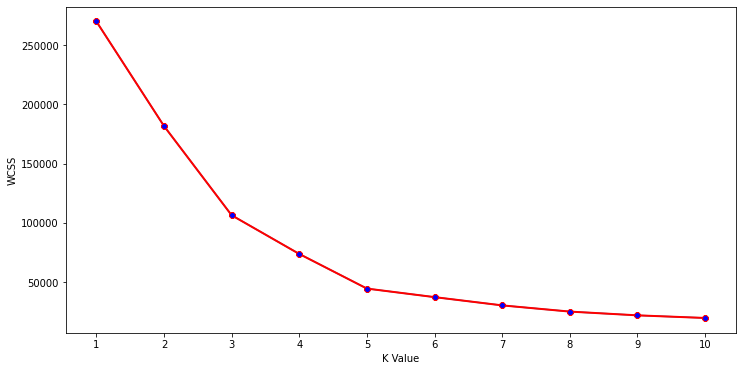

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8",markerfacecolor='blue')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Taking K=5 from the graph (Elbow Curve Graph)

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Clusters

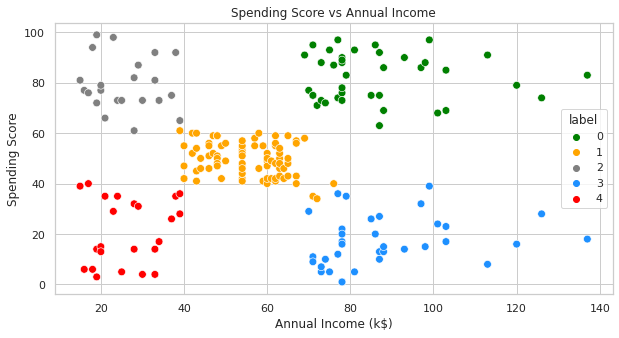

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score',hue="label",  
                 palette=['green','orange','gray','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Annual Income')
plt.show()

**Conclusion :**  We got the value of k = 5 from the elbow graph method and 
            Successfully performed the K- Means clustering on the given dataset.